<a href="https://colab.research.google.com/github/245ansh/MLLL/blob/main/Word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gensim.downloader as api
wv= api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
data="""
The future king is the prince.
Daughter is the princess.
Son is the prince.
Only a man can be a king.
Only a woman can be a queen.
The princess will be a queen.
The prince is a strong man.
The princess is a beautiful woman.
Prince is only a boy now.
Prince will be king.
A boy will be a man
"""


In [5]:
data

'\nThe future king is the prince.\nDaughter is the princess.\nSon is the prince.\nOnly a man can be a king.\nOnly a woman can be a queen.\nThe princess will be a queen.\nThe prince is a strong man.\nThe princess is a beautiful woman.\nPrince is only a boy now.\nPrince will be king.\nA boy will be a man\n'

In [15]:
data=data.split('.')

AttributeError: 'list' object has no attribute 'split'

In [16]:
for i in range(len(data)):
     data[i]= data[i].lower().replace('\n','')
print(data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


In [17]:
stop_words=['the','is','will','be','a','only','can','their','now','and','at','it']
filtered_data=[]
for sent  in data:
  temp=[]
  for word in sent.split():
    if word not in stop_words:
      temp.append(word)
  filtered_data.append(temp)
print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


In [19]:
bigrams=[]
for sent in filtered_data:
  for i in range(len(sent)-1):
    for j in range(i+1,len(sent)):
      bigrams.append([sent[i],sent[j]])
      bigrams.append([sent[j],sent[i]])
print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


In [20]:
all_words=[]
for bu in bigrams:
  all_words.extend(bu)
all_words=list(set(all_words))
print(all_words)


['prince', 'future', 'man', 'princess', 'daughter', 'queen', 'beautiful', 'boy', 'woman', 'strong', 'king', 'son']


In [21]:
words_dict={}
counter=0
for word in all_words:
  words_dict[word]=counter
  counter+=1
print(words_dict)

{'prince': 0, 'future': 1, 'man': 2, 'princess': 3, 'daughter': 4, 'queen': 5, 'beautiful': 6, 'boy': 7, 'woman': 8, 'strong': 9, 'king': 10, 'son': 11}


In [22]:
import numpy as np
onehot_data= np.zeros((len(all_words),len(all_words)))
onehot_data

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
for i in range(len(onehot_data)):
  onehot_data[i][i]=1
print(onehot_data)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [25]:
onehot_dict={}
counter=0
for i in  all_words:
  onehot_dict[i]=onehot_data[counter]
  counter+=1
for word in onehot_dict:
  print(word,": ",onehot_dict[word])

prince :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
man :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
princess :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
queen :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
beautiful :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
boy :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
woman :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
strong :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
king :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
son :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [26]:
X=[]
Y=[]
for bi in bigrams:
  X.append(onehot_dict[bi[0]])
  Y.append(onehot_dict[bi[1]])
X=np.array(X)
Y=np.array(Y)
print(X)
print(Y)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.

In [27]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import tensorflow as tf
tf.random.set_seed(42)
embed_size=2

In [31]:
model=Sequential([
    Dense(embed_size,activation='linear'),
    Dense(Y.shape[1],activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy')
model.fit(X,Y,epochs=100, batch_size=256,verbose=False)

In [32]:
weights= model.get_weights()[0]

In [33]:
word_embeddings={}
for word in all_words:
  word_embeddings[word]=weights[words_dict[word]]

In [34]:
print(word_embeddings)

{'prince': array([-0.09429789, -0.03496589], dtype=float32), 'future': array([-0.44274905,  0.5563534 ], dtype=float32), 'man': array([-0.6043029,  0.5318911], dtype=float32), 'princess': array([-0.20264226,  0.16554886], dtype=float32), 'daughter': array([-0.18923515, -0.23637941], dtype=float32), 'queen': array([-0.4112197 ,  0.28737172], dtype=float32), 'beautiful': array([-0.00898239,  0.07415881], dtype=float32), 'boy': array([-0.21086486, -0.4818752 ], dtype=float32), 'woman': array([0.38465175, 0.38084623], dtype=float32), 'strong': array([0.40559986, 0.37958145], dtype=float32), 'king': array([0.08666072, 0.42089182], dtype=float32), 'son': array([0.37844226, 0.27999076], dtype=float32)}


<function matplotlib.pyplot.show(close=None, block=None)>

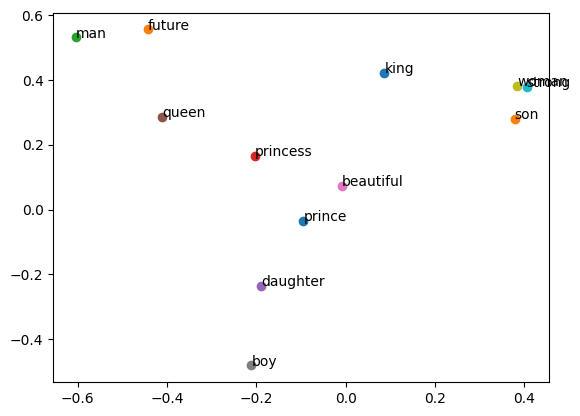

In [35]:
import matplotlib.pyplot as plt
for word in list(words_dict.keys()):
  coord=word_embeddings[word]
  plt.scatter(coord[0],coord[1])
  plt.annotate(word,(coord[0],coord[1]))
plt.show

In [36]:
wv['king']

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [38]:
len(wv['king'])

300

In [40]:
wv['king']-wv['queen']

array([ 1.20727539e-01,  1.73339844e-01,  7.79418945e-02,  1.61132812e-02,
       -1.57470703e-01,  5.27343750e-02,  1.83105469e-01,  1.85546875e-02,
        2.48535156e-01,  3.07617188e-01, -1.66503906e-01,  7.81250000e-02,
       -2.81738281e-01, -2.40859985e-02, -3.00781250e-01, -2.82714844e-01,
       -3.80859375e-02,  5.20935059e-02, -1.95312500e-02,  3.46679688e-02,
       -5.37109375e-02, -2.39257812e-02,  2.95898438e-01,  2.55371094e-01,
        3.56445312e-02, -1.23535156e-01,  5.66406250e-02, -3.19824219e-02,
        1.53320312e-01,  1.35864258e-01,  2.60742188e-01,  1.92626953e-01,
        2.07031250e-01,  1.87500000e-01,  3.32031250e-02,  2.15820312e-01,
       -5.71289062e-02, -2.57812500e-01,  1.65039062e-01, -1.07421875e-02,
        3.17382812e-02,  1.84570312e-01,  1.36718750e-02,  1.70288086e-01,
        1.66015625e-01,  8.88671875e-02, -1.05743408e-01, -1.12304688e-01,
       -2.10937500e-01, -2.52258301e-01, -1.44165039e-01,  5.95703125e-02,
       -3.12744141e-01,  

In [44]:
wv.most_similar('king')

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [46]:
wv.similarity('king','queen')

0.6510957

In [47]:
wv.similarity('king','pizza')

0.10545972

In [50]:
import pandas as pd
data=pd.read_json('/content/Cell_Phones_and_Accessories_5.json',lines=True)

ValueError: Unmatched ''"' when when decoding 'string'